다음의 노트북을 필사했습니다.  
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

# Introduction: Home Credit Default Risk Competition

이 노트북은 머신러닝 대회나 문제에 대해서 친절한 소개를 원하는 새로운 사람들을 위한 것입니다. 저는 일부러 복잡한 모델이나 많은 데이터를 join하지 않도록 피했으며 이로써 머신러닝을 어떻게 시작해야 하는지에 대한 기초를 보여줄 것입니다.

이 노트북에서 우리는 캐글에서 현재 개최한 Home Credit default risk 머신러닝 대회를 처음 볼 것입니다. 이 대회의 목적은 과거 대출 신청 데이터를 사용해 신청자가 대출을 값을 수 있을지 없을지를 예측할 것입니다. 이는 표준 지도 분류 과제입니다.  
* **Supervised**: 레이블은 training data에 포함되며 목표는 모델을 배우도록 학습시켜 피처들의 레이블을 예측하는 것입니다.  
* **Classification**: 레이블은 이진 변수이며 0(제 때 대출을 값는 것), 1(대출을 값는데 어려움을 겪는 것) 입니다.

# Data

7개의 서로 다른 데이터의 Source가 있습니다.  
* `application_train/application_test`: Home Credit에 대한 각각의 대출 신청에 대한 정보이며 주요 트레이닝, 테스팅 데이터입니다. 각각의 대출은 고유의 행이 있으며 이 행은 `SK_ID_CURR` 피처에 의해 식별됩니다. 트레이닝 신청 데이터는 0과 1을 나타내는 `TARGET`과 함께 제공됩니다.  
* `breau`: 다른 금융 기관으로부터의 고객의 이전 신용을 고려한 데이터입니다. 각각의 이전 신용은 bureau에서 고유의 행을 갖습니다. 하지만 신청 데이터에서 하나의 대출은  다수의 이전 신용을 가질 수 있습니다.  
* `bureau_balance`: bureau에서 이전 신용에 대한 월간 데이터입니다. 각각의 행은 이전 대출에 대한 한달치 이며 단일의 이전 신용도는 다수의 행을 가질 수 있고, 한달에 하나씩입니다.  
* `previous_application`: 신청 데이터에서 대출을 가진 Home Credit의 고객에 대한 이전 대출 신청입니다. 신청 데이터에서 각각의 현재 대출은 다수의 이전 대출을 가질 수 있습니다. 가각의 이전 신청은 하나의 행을 가지며 `SK_ID_PREV` 피처에 의해 식별됩니다.  
* `POS_CASH_BALANCE`: 이전 판매 시점이나 현금 대출에 대한 월간 데이터입니다. 고객이 Home Credit에 대해 가지고 있었던. 각각의 행은 한달치입니다. 이전 시점의 판매나 현금 대출에 대해서. 그리고 하나의 이전 대출은 다수의 행을 가질 수 있습니다.  
* `credit_card_balance`: 이전 신용카드에 대한 월간 데이터입니다. 고객이 Home Credit에 가졌던. 각각의 행은 신용카드 잔액에 대한 한달치이며 단일 credit card는 많은 행을 가질 수 있습니다.  
* `installments_payment`: Home Credit에 대한 이전 대출의 납입 내역입니다. 각각의 납입이 이루어질 때, 혹은 납입이 이루어지지 않을 때 마다 하나의 행이 만들어집니다.  
아래의 다이어그램은 어떻게 데이터가 연관돼 있는지 보여줍니다.

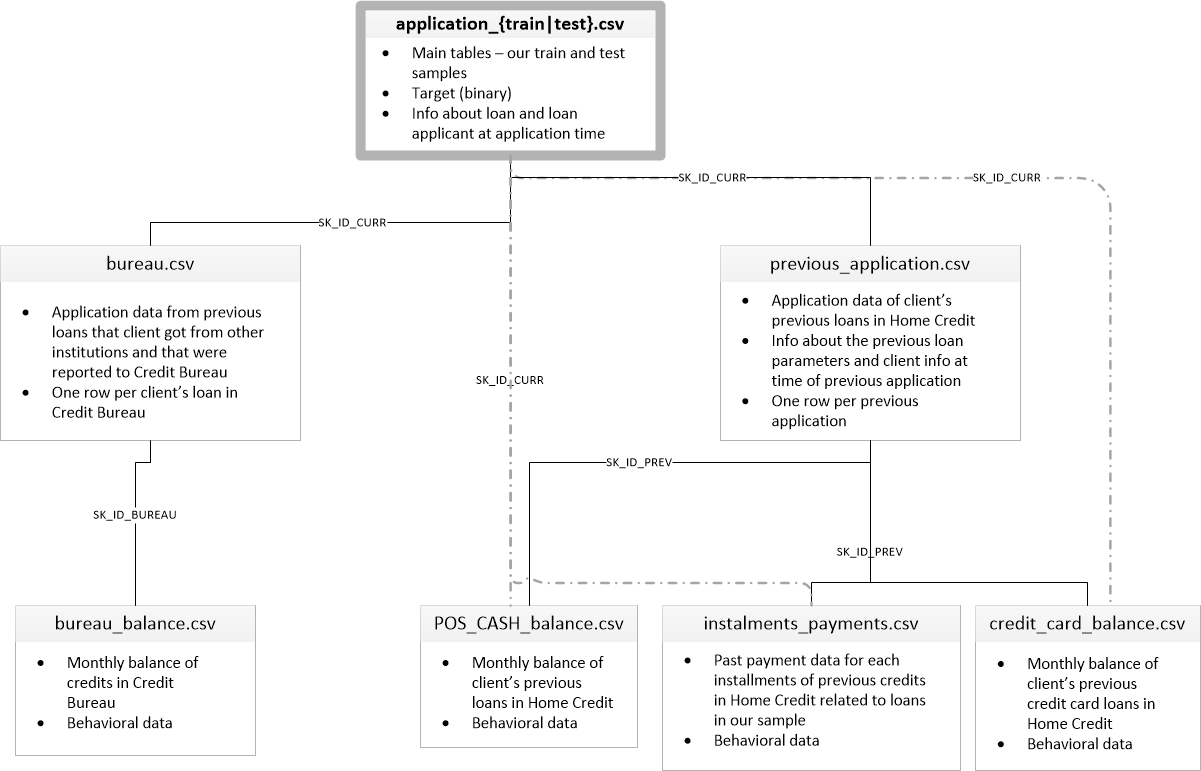

더욱이 모든 컬럼에 대한 정의와 제출 파일의 예제가 제공됩니다. (csv 파일로)

이 노트북에서는 붙여서 사용할 것입니다. 오직 주요 신청의 트레이닝, 테스팅 데이터를. 비록 진지하게 경쟁하려는 희망을 갖고 있더라도 지금은 붙여서 하나의 파일을 만들 것입니다. 이렇게 함으로써 더욱 관리하기 쉬워질 것입니다. 이는 향상시킬 여지가 있는 baseline을 구축하도록 만들 것입니다. 지금 이러한 프로젝트에서 최선은 문제에 대한 이해도를 한 번에 조금씩 높여 나가는 것입니다. 모든 방식을 분리하기 보다는. 이렇게 되면 완전히 잃어버릴 것입니다.

## Metric: ROC AUC

일단 한 번 데이터에 대해 이해하게 되면(컬럼에 대한 설명을 읽음으로써 매우 많은 도움이 될 것입니다.) 우리는 메트릭을 이해할 필요가 있습니다. 이로써 submssion이 정의될 것입니다.

ROC AUC는 아마 위축되게 들릴 수 있습니다. 하지만 이는 상대적으로 쉽습니다. 일단 두 개의 개별적인 개념을 머릿속에 넣게 되면. Reciever Operating Characteristic(ROC) 곡선은 표현됩니다. True positive 대 False positive 비율로

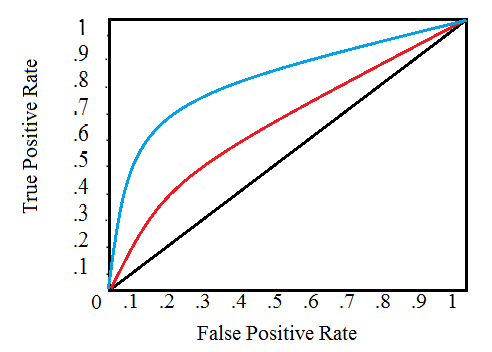

## Imports

In [3]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

## Read in Data

첫 번째로 모든 가능한 데이터 파일을 리스트화할 수 있습니다. 총 9개의 파일이 있습니다. 이 중 트레이닝을 위한 하나의 메인 파일과 테스팅을 위한 1개의 메인 파일이 있으며 1개의 제출 예시 파일, 그리고 6개의 다른 파일들이 있습니다. 이 6개의 파일은 각각의 대출에 대한 부가적인 정보를 포함합니다.

In [14]:
# List files available
temp_list = os.listdir('../Home Credit Default Risk/')
temp_list

['.ipynb_checkpoints',
 'application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv',
 'Untitled.ipynb']

In [15]:
temp_list = temp_list[1:-2]
temp_list

['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv']

In [20]:
# Training data
app_train = pd.read_csv('../Home Credit Default Risk/application_train.csv')
print('Training data shape:', app_train.shape)
app_train.head()

Training data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Testing data featires
app_test = pd.read_csv('../Home Credit Default Risk/application_test.csv')
print('Testing data shape:', app_test.shape)
app_test.head()

Testing data shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


테스트셋은 `TARGET` 컬럼과 상당히 부족하며 `TARGET` 컬럼이 없습니다.

# Exploratory Data Analysis

EDA는 제약을 두지 않은 프로세스이며 여기서 우리는 통계를 계산하며 추세와 이상탐지, 패턴, 또는 데이터 안의 관계를 찾아냅니다. EDA의 목적은 우리의 데이터가 말해줄 수 있는 부분을 배우는 것입니다. 이는 일반적으로 높은 정도의 overview로부터 시작합니다. 그다음 구체적인 영역으로 좁혀갑니다. 흥미로운 영역을 발견함에 따라서. 조사 결과는 아마 그 자체로 흥미로울 수 있으며 또는 결과는 어떤 모델을 쓸지에 대한 정보를 알려줄 수 있을 것입니다. 예를 들어 어떤 피처를 사용할지 도움을 줌으로써  

## Examine the Distribution of the Target Column

타겟은 우리가 무엇을 예측할지 묻는 것입니다.  
* 대출이 제 때 갚아진 것을 뜻하는 0  
* 고객이 납입에 어려움을 겪는 것을 가리키는 1  
첫번째로 각 범주에 속하는 수를 조사할 수 있을 것입니다.

In [23]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

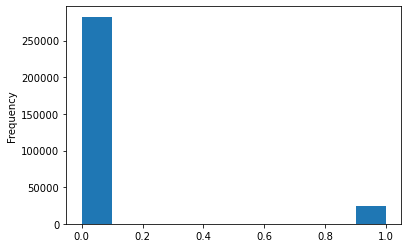

In [25]:
app_train['TARGET'].astype(int).plot.hist();

이러한 정보로부터 class가 불균형한 문제를 겪는다는 것을 알 수 있습니다. 훨씬 더 많은 대출이 제 때 갚아졌습니다. 갚아지지 않은 대출에 비해서. 우리가 더욱 정교한 머신러닝 모델을 가졌다면 class들에 가중치를 중 수 있습니다. 어떤 표현이냐면 data가 불균형하다는 신호 

## Examine Missing Values

다음으로 각각의 컬럼의 결측치 퍼센티지와 갯수를 살펴볼 수 있습니다.

In [30]:
# Function to calculate missing values by column funct

def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values / (결측치 개수 / 전체 길이) * 100
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # make a table with the results
    mis_val_tabel = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_tabel.rename(
    columns = {0: 'Missing Values', 1: '% of Total Values'})
    
    # Sort the table by percentage of missing descending / 결측치 퍼센트가 0이 아닌 것들을 정렬함
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    
    # print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns. \n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
                          "columns that have missing values.")
          
    # return the dataframe with missing information
    return mis_val_table_ren_columns

In [33]:
mis_val = app_train.isnull().sum()

mis_val_percent = 100 * app_train.isnull().sum() / len(app_train)

mis_val_tabel = pd.concat([mis_val, mis_val_percent], axis=1)

mis_val_tabel

,0,1
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631


In [31]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns. 
There are 67columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


머신러닝 모델을 만들 때가 되면 이러한 결측치를 채워야 합니다. 나중에 결측치를 다룰 수 있는  XGBoost와 같은 모델을 사용할 것입니다. 또 다른 옵션은 높은 비율의 결측치가 있는 컬럼을 삭제하는 것입니다. 비록 이러한 컬럼들이 모델에 도움이 될지 사전에 아는 것이 불가능할 지라도. 그러므로 지금은 이러한 컬럼들을 놔두겠습니다. 

## column Types

각각의 데이터 타입에 따른 컬럼들의 갯수를 보겠습니다. `int64` 그리고 `float64`는 numeric 변수입니다. (이들은 이산적이거나 연속적일 수 있습니다.) `object` 컬럼은 문자를 포함하는데 이는 categorical features입니다.

In [34]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

이제 고유한 항목의 수를 살펴 보겠습니다. 각각의 `object` 컬럼에 대해서

In [36]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

대부분의 범주형 변수는 상대적으로 적은 고유 항목을 가졌습니다. 우리는 다루는 방법을 찾아내야 합니다. 이러한 범주형 변수들을

## Encoding Categorical Variables

### Label Encoding and One-Hot Encoding

2개의 고유 범주가 있는 어떤 범주형 변수에 대해 우리는 label encoding을 사용하고 그 이상의 고유 범주가 있는 것에는 원-핫 인코딩을 사용할 것입니다.

In [37]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # if 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [38]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape:', app_train.shape)
print('Testing Features shape:', app_test.shape)

Training Features shape: (307511, 243)
Testing Features shape: (48744, 239)


### Aligning Training and Testing Data

train, test 데이터에서 똑같은 컬럼이 필요합니다. 원-핫 인코딩은 더 많은 컬럼을 생성했습니다. 트레이닝 데이터에서. 왜냐하면 테스트 데이터에 표현되지 않은 카테고리가 있었기 때문입니다. 트레이닝 데이터에 있는 이 컬럼을 지우기 위해서는 데이터 프레임을 `align` 해야 합니다. 첫번째로 트레이닝 데이터에서 타겟 컬럼을 추출하겠습니다.(이는 테스팅 데이터에 없지만 이 정보를 가지고 있어야 하기 때문입니다.) align을 할 때 `axis=1`로 설정하면 데이터 프레임이 행이 아니라 컬럼을 기준으로 정렬됩니다.

align 매서드 참고 링크  
https://kongdols-room.tistory.com/164  

align에서 join 파라미터는 inner, left, right가 있다. 이들은 데이터프레임을 합치는 것이 아니라 join 기준에 따라 각자의 데이터 프레임의 컬럼 혹은 행을 변형한다.

In [39]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape:', app_train.shape)
print('Testing Features shape:', app_test.shape)

Training Features shape: (307511, 240)
Testing Features shape: (48744, 239)


트레이닝, 테스트 데이터셋은 이제 같은 피처를 가졌습니다. 이들은 머신러닝에 필요합니다. 피처의 수는 원-핫 인코딩으로 인해 상당히 증가했습니다. 어느 시점에서는 아마 차원 축소를 시도하고 싶을 것입니다. 데이터셋의 사이즈를 줄이기 위해서

## Back to Exploratory Data Analysis

### Anomalies

EDA를 함에 있어서 우리가 항상 경계하고 싶은 한 가지 문제는 데이터 안에 있는 변칙입니다. 이들은  아마도 잘못 입력된 숫자, 설비를 측정하는데 있어서의 에러, 또는 유효하지만 매우 큰 숫자 때문일 것입니다. 이상을 정량적으로 돕는 한 가지 방법은 `describe` 메서드를 이용해 컬럼의 통계량을 살펴보는 것입니다. `DAYS_BIRTH` 컬럼의 숫자는 음수입니다. 왜냐하면 이들은 현재 대출 신청과 비교해 기록되었기 때문입니다. 이들의 년 단위 통계를 보려면 -1을 곱해주고 일(day) 수로 나눠주는 것입니다.

In [43]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [42]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

이러한 나이는 합리적인듯 보입니다. 나이의 상한이나 하한에 대해서 특이값이 없습니다. 채용에 대한 일수에 대해서는 어떨까요?

In [44]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

이들은 맞지 않는 것 같아 보입니다. 최대값이 positive일 뿐 아니라 1000년입니다.

Text(0.5, 0, 'Days Employment')

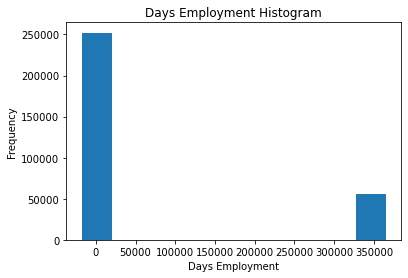

In [45]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

변칙적인 클라이언트의 부분 집합을 취하여 나머지 클라이언트보다 더 높은 또는 낮은 파산 비율을 갖는 경향이 있는지 알아보겠습니다.

In [49]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]

print('The non-anomalies default on %0.2f%% if loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% if loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment
